# SimpleRNN Test Code

In [21]:
import warnings
warnings.filterwarnings('ignore')

> ## Import Packages

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# I. SimpleRNN - without Normalization

> ## 1) Sample Data

* Inputs 데이터 생성(100, 5, 1)

In [32]:
X = [ [ [i + j] for i in range(5) ] for j in range(100) ]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

In [30]:
X[:3]

array([[[0.],
        [1.],
        [2.],
        [3.],
        [4.]],

       [[1.],
        [2.],
        [3.],
        [4.],
        [5.]],

       [[2.],
        [3.],
        [4.],
        [5.],
        [6.]]])

In [29]:
X[-3:]

array([[[ 97.],
        [ 98.],
        [ 99.],
        [100.],
        [101.]],

       [[ 98.],
        [ 99.],
        [100.],
        [101.],
        [102.]],

       [[ 99.],
        [100.],
        [101.],
        [102.],
        [103.]]])

In [33]:
# X = [ [ i + j for i in range(5) ] for j in range(100) ]

# X[:3], X[-3:]

([[0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [2, 3, 4, 5, 6]],
 [[97, 98, 99, 100, 101], [98, 99, 100, 101, 102], [99, 100, 101, 102, 103]])

* Outputs 데이터 생성(100, 1)

In [24]:
y = [(i + 5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

> ## 2) numpy_Array Casting

In [25]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

In [28]:
X[0]

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

> ## 3) Train vs. Test Split

* 80:20

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary
* Unit(output_dim) : 3
* input_shape(input_lenght, input_dim) : (5, 1)
* return_sequences = False : 최종 Unit(=node)만 출력, 5번 순환 결과 최종 아웃풋만 출력하겠다.
* layers.Dense(1) : y_hat


In [7]:
from tensorflow.keras import models, layers

model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,  # hidden layer의 node 3개
                             input_shape = (5, 1),  # 5번 순환
                             return_sequences = False))
model_1.add(layers.Dense(1)) # output

model_1.summary()
# simple rnn의 param이 9개가 아닌 15개가 나온이유 : 가중치가 다른레이어에도 순환하기 때문
# wx1, wt1, b1, wt2, wt3
# wx2, wt2, b2, wt1, wt3
# wx3, wt3, b3, wt1, wt2

Model: "SimpleRNN_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 15        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [8]:
model_1.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['mae'])

### (3) Model Fit

In [9]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test), 
                     verbose = 0)

### (4) Model Predict

In [10]:
y_hat = model_1.predict(X_test, verbose = 0)

### (5) 학습 결과 시각화

* Loss 감소

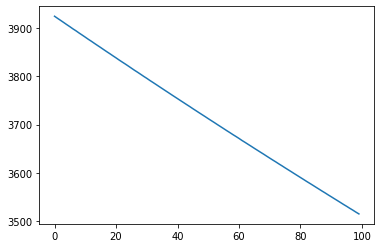

In [11]:
plt.plot(Hist_1.history['loss'])
plt.show()

* 학습 되지 않음
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

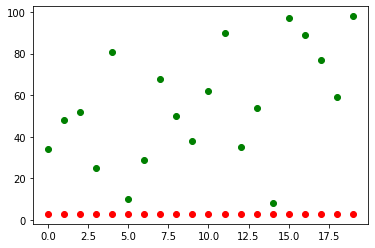

In [12]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# II. SimpleRNN - with Normalization

> ## 1) Sample Data - with Normalization

In [13]:
X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

> ## 2) Casting

In [14]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary
* None : input_length 자동 맞춤


In [16]:
model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), # None 입력시 -1처럼 형을 맞춰줌
                             return_sequences = False))
model_2.add(layers.Dense(1))

model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [17]:
model_2.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['mae'])

### (3) Model Fit

In [18]:
Hist_2 = model_2.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test), 
                     verbose = 0)

### (4) Model Predict

In [19]:
y_hat = model_2.predict(X_test, verbose = 0)

### (5) 학습 결과 시각화

* Loss 감소

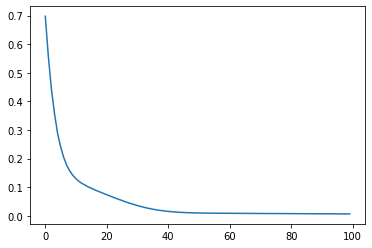

In [20]:
plt.plot(Hist_2.history['loss'])
plt.show()

* 학습 진행
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

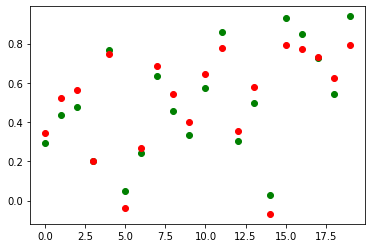

In [21]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# III. Stacked_SimpleRNN
- rnn + rnn..
- stack으로 쌓을 때에는 다음 RNN의 인풋을 위해, 앞 RNN이 순환할 떄마다 출력을 해줘야함.
- return_sequences = True

> ## 1) Model Define & Summary

* return_sequences = True

In [19]:
model_3 = models.Sequential(name = 'Stackd_RNN')
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), 
                             return_sequences = True)) #  5번 순환 할 때마다 아웃풋을 출력하겠다.
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = False)) # 5번 순환 후 최종 아웃풋만 출력하겠다.
model_3.add(layers.Dense(1))

model_3.summary()

NameError: name 'models' is not defined

> ## 2) Model Compile

In [23]:
model_3.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['mae'])

> ## 3) Model Fit

In [24]:
Hist_3 = model_3.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test), 
                     verbose = 0)

> ## 4) Model Predict

In [25]:
y_hat = model_3.predict(X_test, verbose = 0)

> ## 5) 학습 결과 시각화

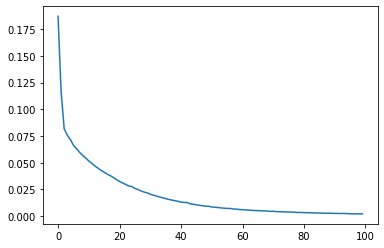

In [26]:
plt.plot(Hist_3.history['loss'])
plt.show()

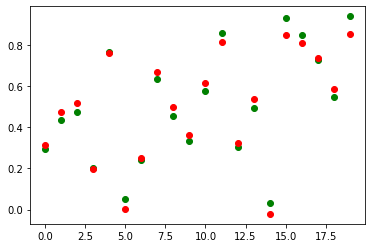

In [27]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# IV. '<font color = 'red'>return_sequences</font>' Output_Options

* '<font color = 'red'>input_length</font>'에 대한 Sequance 전체를 출력할지 설정
 - Sequence: Hidden State
 - 'False' vs. 'True'

> ## 1) 실습데이터 생성

In [41]:
X = [[[i + j] for i in range(5)] for j in range(100)]
y = [i + 5 for i in range(100)]

In [42]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 2) 테스트용 Input Data

In [44]:
X_test[0].reshape(1, 5, 1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

> ## 3) <font color = 'blue'>False</font>_Option

* 마지막 Output만 출력
 * <font color = 'red'>Unit -> 1

In [45]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['mae'])

* <font color = 'red'>Output 1개

In [46]:
Model_False.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[-1.]], dtype=float32)

* 마지막 Output만 출력
 * <font color = 'red'>Unit -> 3

In [47]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['mae'])

* <font color = 'red'>Output 1개(3개 Unit)

In [48]:
Model_False.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[-1., -1., -1.]], dtype=float32)

> ## 4) <font color = 'blue'>True</font>_Option

* 매 순환마다 Output 출력
 * Unit -> 1
 * <font color = 'red'>input_length -> 5

In [49]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['mae'])

* <font color = 'red'>Output 5개(Hidden State)

In [50]:
Model_True.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.]]], dtype=float32)

* 매 순환마다 Output만 출력
 * Unit -> 3
 * <font color = 'red'>input_length -> 5

In [51]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['mae'])

* <font color = 'red'>Output 5개(Hidden State)

In [52]:
Model_True.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[[ 1., -1., -1.],
        [ 1., -1., -1.],
        [ 1., -1., -1.],
        [ 1., -1., -1.],
        [ 1., -1., -1.]]], dtype=float32)

# 
# 
# 
# The End
# 
# 
# 